In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
nasdaq = pd.read_excel('Data/listings.xlsx', sheetname = 'nasdaq', na_value = 'n/a')
market_cap = nasdaq['Market Capitalization'].div(10**6)

In [3]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


In [4]:
# group data by sector
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)
nasdaq = nasdaq.drop('Market Capitalization', axis=1)
nasdaq_by_sector = nasdaq.groupby('Sector')

In [5]:
for sector, data in nasdaq_by_sector:
    print(sector, data.market_cap_m.mean())

Basic Industries 724.8999338580089
Capital Goods 1511.2373727809977
Consumer Durables 839.8026066270024
Consumer Non-Durables 3104.0512055241347
Consumer Services 5582.34417481941
Energy 826.6076078547273
Finance 1044.090204799632
Health Care 1758.709196756267
Miscellaneous 3445.6559345579662
Public Utilities 2357.865315073336
Technology 10883.434213546776
Transportation 2869.660006726413


In [6]:
# skip the loop
mcap_by_sector = nasdaq_by_sector.market_cap_m.mean()
mcap_by_sector

Sector
Basic Industries           724.899934
Capital Goods             1511.237373
Consumer Durables          839.802607
Consumer Non-Durables     3104.051206
Consumer Services         5582.344175
Energy                     826.607608
Finance                   1044.090205
Health Care               1758.709197
Miscellaneous             3445.655935
Public Utilities          2357.865315
Technology               10883.434214
Transportation            2869.660007
Name: market_cap_m, dtype: float64

In [7]:
# plot categorical variables

Text(0.5,0,'USD mn')

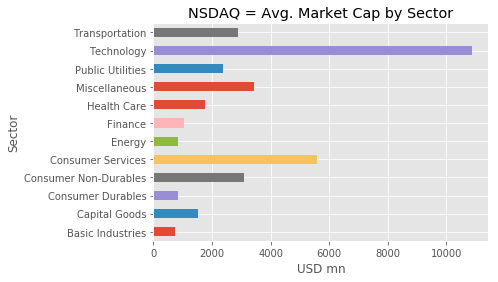

In [8]:
title = 'NSDAQ = Avg. Market Cap by Sector'
mcap_by_sector.plot(kind = 'barh', title = title)
plt.xlabel('USD mn')

In [9]:
# summary for all numeric columns
nasdaq_by_sector.mean()

,Last Sale,IPO Year,market_cap_m
Sector,,,
Basic Industries,21.597679,2000.766667,724.899934
Capital Goods,26.188681,2001.324675,1511.237373
Consumer Durables,24.363391,2003.222222,839.802607
Consumer Non-Durables,25.749565,2000.609756,3104.051206
Consumer Services,34.917318,2004.104575,5582.344175
Energy,15.496834,2008.034483,826.607608
Finance,29.644242,2010.321101,1044.090205
Health Care,19.462531,2009.240409,1758.709197
Miscellaneous,46.094369,2004.333333,3445.655935


In [11]:
# more on aggregate
nasdaq = pd.read_excel('Data/listings.xlsx', sheetname = 'nasdaq', na_value = 'n/a')
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)
by_sector = nasdaq.groupby('Sector')
by_sector.market_cap_m.agg(['size', 'mean']).sort_values('size')

,size,mean
Sector,,
Transportation,52,2869.660007
Energy,66,826.607608
Public Utilities,66,2357.865315
Basic Industries,78,724.899934
Consumer Durables,88,839.802607
Miscellaneous,89,3445.655935
Consumer Non-Durables,103,3104.051206
Capital Goods,172,1511.237373
Consumer Services,348,5582.344175


In [12]:
# several agg plut new labels
by_sector.market_cap_m.agg({'#Obs':'size', 'Average':'mean'})

,#Obs,Average
Sector,,
Basic Industries,78,724.899934
Capital Goods,172,1511.237373
Consumer Durables,88,839.802607
Consumer Non-Durables,103,3104.051206
Consumer Services,348,5582.344175
Energy,66,826.607608
Finance,627,1044.090205
Health Care,645,1758.709197
Miscellaneous,89,3445.655935


In [13]:
# different stats by column
by_sector.agg({'market_cap_m': 'size', 'IPO Year':'median'})

,IPO Year,market_cap_m
Sector,,
Basic Industries,1996.5,78
Capital Goods,2000.0,172
Consumer Durables,2002.5,88
Consumer Non-Durables,1998.0,103
Consumer Services,2005.0,348
Energy,2011.0,66
Finance,2014.0,627
Health Care,2014.0,645
Miscellaneous,2005.0,89


In [14]:
# agg by two categorical variables
by_sector_year = nasdaq.groupby(['Sector', 'IPO Year'])
by_sector_year.market_cap_m.mean()

Sector            IPO Year
Basic Industries  1972.0        877.240005
                  1973.0       1445.697371
                  1986.0       1396.817381
                  1988.0         24.847526
                  1990.0        434.808483
                  1991.0          9.338401
                  1992.0        160.416661
                  1993.0       1933.224036
                  1994.0        163.267514
                  1995.0        125.342784
                  1996.0       4087.508427
                  1997.0         20.754774
                  2008.0        331.370813
                  2010.0        120.296167
                  2011.0         35.498729
                  2012.0        381.796074
                  2013.0         22.661533
                  2015.0        260.075564
                  2016.0         81.288336
Capital Goods     1972.0        889.230257
                  1980.0      14941.006076
                  1981.0         38.632877
                  1983.0   

In [16]:
# use MultiIndex
mcap_sector_year = by_sector_year.market_cap_m.mean()
mcap_sector_year.loc['Basic Industries']

IPO Year
1972.0     877.240005
1973.0    1445.697371
1986.0    1396.817381
1988.0      24.847526
1990.0     434.808483
1991.0       9.338401
1992.0     160.416661
1993.0    1933.224036
1994.0     163.267514
1995.0     125.342784
1996.0    4087.508427
1997.0      20.754774
2008.0     331.370813
2010.0     120.296167
2011.0      35.498729
2012.0     381.796074
2013.0      22.661533
2015.0     260.075564
2016.0      81.288336
Name: market_cap_m, dtype: float64

In [17]:
mcap_sector_year.loc[['Basic Industries', 'Transportation']]

Sector            IPO Year
Basic Industries  1972.0       877.240005
                  1973.0      1445.697371
                  1986.0      1396.817381
                  1988.0        24.847526
                  1990.0       434.808483
                  1991.0         9.338401
                  1992.0       160.416661
                  1993.0      1933.224036
                  1994.0       163.267514
                  1995.0       125.342784
                  1996.0      4087.508427
                  1997.0        20.754774
                  2008.0       331.370813
                  2010.0       120.296167
                  2011.0        35.498729
                  2012.0       381.796074
                  2013.0        22.661533
                  2015.0       260.075564
                  2016.0        81.288336
Transportation    1986.0      1176.179710
                  1991.0      6646.778622
                  1992.0        56.074572
                  1993.0      3474.796885
       

In [18]:
# use seaborn

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

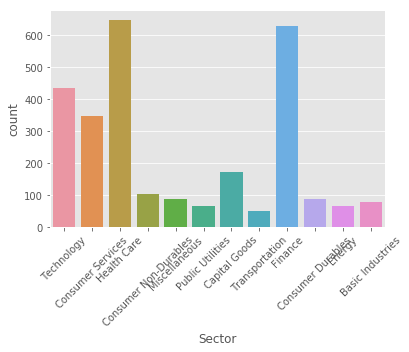

In [21]:
nasdaq = pd.read_excel('Data/listings.xlsx', sheetname = 'nasdaq', na_value = 'n/a')
sns.countplot(x='Sector', data = nasdaq)
plt.xticks(rotation = 45)

In [22]:
# sorted countplot
sector_size = nasdaq.groupby('Sector').size()
order = sector_size.sort_values(ascending=False)
order.head()

Sector
Health Care          645
Finance              627
Technology           433
Consumer Services    348
Capital Goods        172
dtype: int64

In [23]:
order = order.index.tolist()

Text(0.5,1,'# obs per sector')

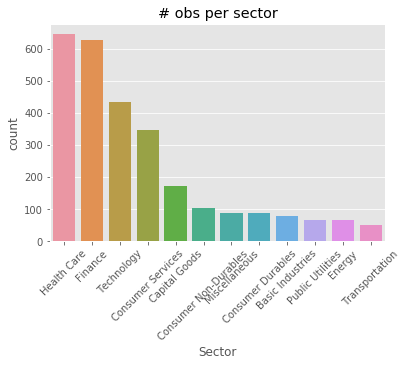

In [24]:
sns.countplot(x='Sector', data=nasdaq, order=order)
plt.xticks(rotation=45)
plt.title('# obs per sector')